In [1]:
#1. Import The Libraries And Dataset

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# Configure Seaborn for dark theme
sns.set(
    context='talk',
    style='dark',  # Set to 'dark' for a dark background
    palette='deep',
    font='sans-serif',
    rc={
        'figure.figsize': (10, 6),
        'axes.grid': True,
        'text.color': 'white',  # Set text color to white
        'axes.labelcolor': 'white',  # Set axis label color to white
        'xtick.color': 'white',  # Set x-tick color to white
        'ytick.color': 'white',  # Set y-tick color to white
    }
)

# Configure Matplotlib to match the dark theme
plt.rcParams.update({
    'axes.facecolor': 'black',  # Set the background color of the axes
    'figure.facecolor': 'black',  # Set the background color of the figure
    'savefig.facecolor': 'black',  # Set the color for saved figures
    'grid.color': 'gray',  # Set grid color to a lighter shade
    'axes.edgecolor': 'white'  # Set the border color to white
})

import warnings
warnings.filterwarnings("ignore")

In [3]:
df=pd.read_csv("/content/drive/MyDrive/DS360 Machine Learning/Course DSML/heart.csv")

In [4]:
#2. Display Top 5 Rows of The Dataset

df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [5]:
#3. Check The Last 5 Rows of The Dataset

df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1
1024,54,1,0,120,188,0,1,113,0,1.4,1,1,3,0


In [6]:
#4. Find Shape of Our Dataset (Number of Rows And Number of Columns)

df.shape

(1025, 14)

In [7]:
#5. Get Information About Our Dataset Like Total Number Rows, Total Number of Columns, Datatypes of Each Column And Memory Requirement

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [8]:
#6. Check Null Values In The Dataset

df.isnull().sum()

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalach,0
exang,0
oldpeak,0


In [9]:
#7. Check For Duplicate Data and Drop Them

print(f"There are {df.duplicated().sum()} duplicate rows in the dataset")

There are 723 duplicate rows in the dataset


In [10]:
df.drop_duplicates(inplace=True)

print(f"There are {df.duplicated().sum()} duplicate rows in the dataset")

There are 0 duplicate rows in the dataset


In [11]:
df.shape

(302, 14)

In [12]:
#8. Get Overall Statistics About The Dataset

np.round(df.describe(), 2)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,302.00,302.00,302.00,302.00,302.00,302.00,302.00,302.00,302.00,302.00,302.00,302.00,302.00,302.00
mean,54.42,0.68,0.96,131.60,246.50,0.15,0.53,149.57,0.33,1.04,1.40,0.72,2.31,0.54
std,9.05,0.47,1.03,17.56,51.75,0.36,0.53,22.90,0.47,1.16,0.62,1.01,0.61,0.50
min,29.00,0.00,0.00,94.00,126.00,0.00,0.00,71.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,48.00,0.00,0.00,120.00,211.00,0.00,0.00,133.25,0.00,0.00,1.00,0.00,2.00,0.00
50%,55.50,1.00,1.00,130.00,240.50,0.00,1.00,152.50,0.00,0.80,1.00,0.00,2.00,1.00
75%,61.00,1.00,2.00,140.00,274.75,0.00,1.00,166.00,1.00,1.60,2.00,1.00,3.00,1.00
max,77.00,1.00,3.00,200.00,564.00,1.00,2.00,202.00,1.00,6.20,2.00,4.00,3.00,1.00


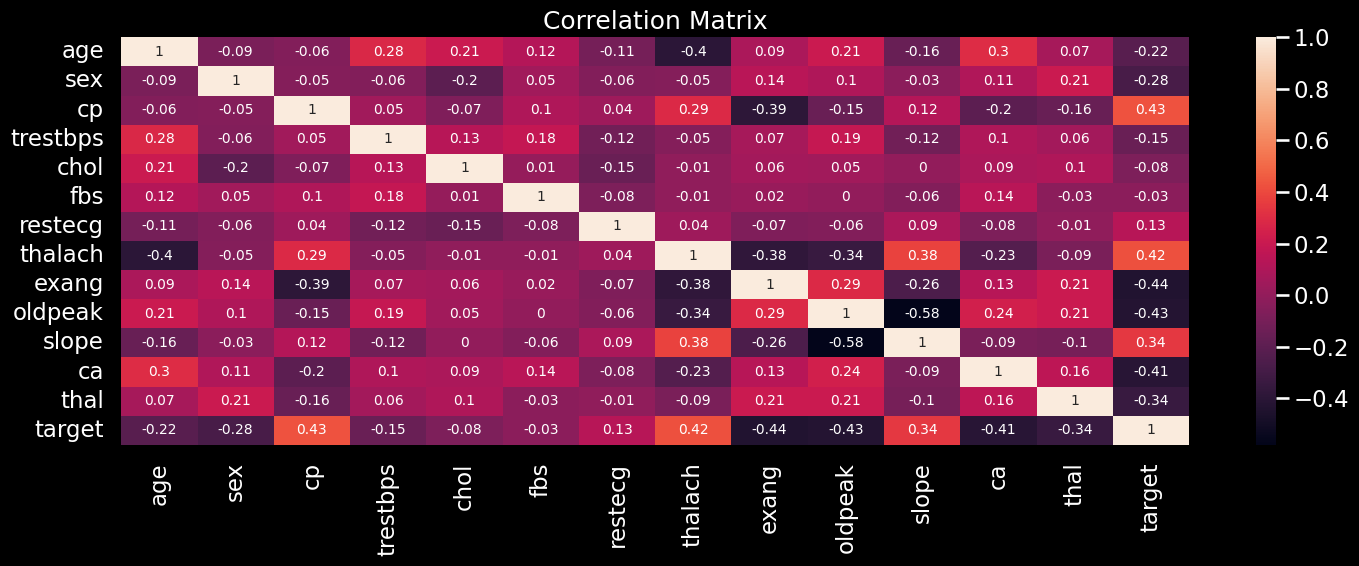

In [13]:
#9. Draw Correlation Matrix

plt.figure(figsize=(15, 6))
sns.heatmap(np.round(df.corr(), 2), annot=True, annot_kws={"size": 10})
plt.title("Correlation Matrix")
plt.tight_layout()
plt.show()

In [14]:
#10. How Many People Have Heart Disease, And How Many Don't Have Heart Disease In This Dataset?

print(f"There are {df[df['target'] == 1].count()[0]} people have heart diesease and {df[df['target'] == 0].count()[0]} have no disease")

There are 164 people have heart diesease and 138 have no disease


In [15]:
#11. Find Count of  Male & Female in this Dataset

df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [16]:
print(f"Male count: {len(df[df['sex'] == 1])} and Female count: {len(df[df['sex'] == 0])}")

Male count: 206 and Female count: 96


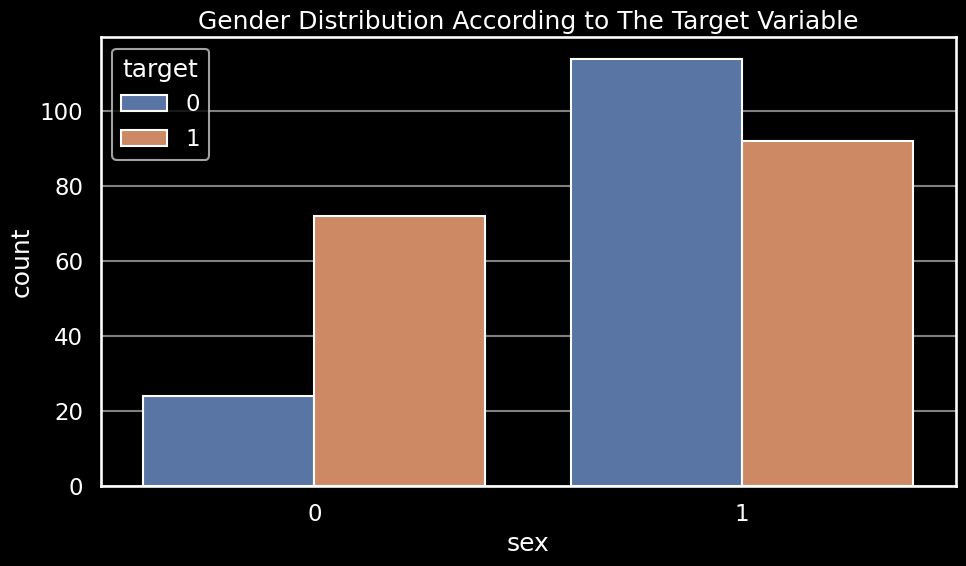

In [17]:
#12. Find Gender Distribution According to The Target Variable

sns.countplot(data=df, x="sex", hue="target")
plt.title("Gender Distribution According to The Target Variable")
plt.tight_layout()
plt.show()

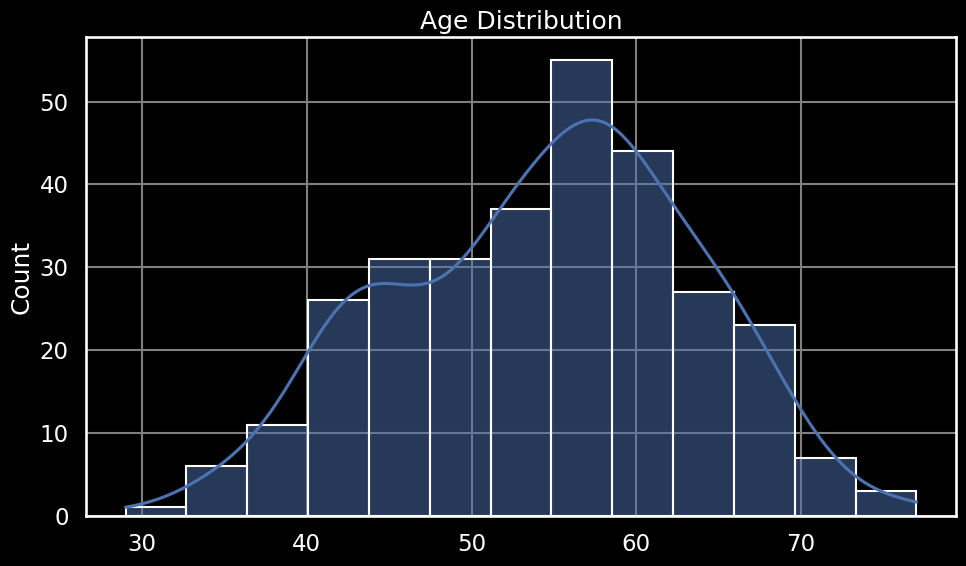

In [18]:
#13. Check Age Distribution In The Dataset

sns.histplot(data=df, x='age', kde=True)
plt.title("Age Distribution")
plt.xlabel("")
plt.tight_layout()
plt.show()

In [19]:
#14. Check Chest Pain Type

df.cp.dtypes

dtype('int64')

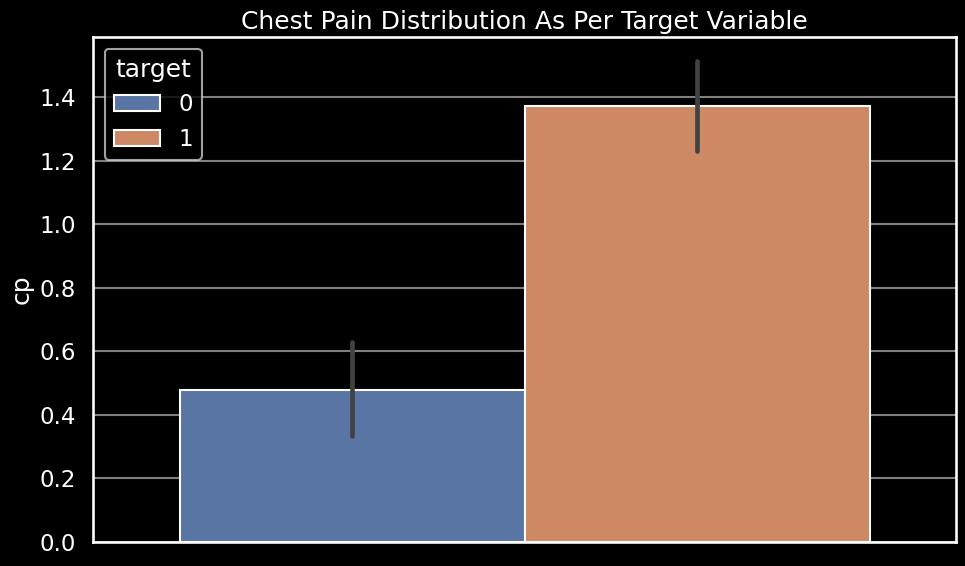

In [20]:
#15. Show The Chest Pain Distribution As Per Target Variable

sns.barplot(data=df, y="cp", hue="target")
plt.title("Chest Pain Distribution As Per Target Variable")
plt.tight_layout()
plt.show()

In [21]:
#16. Show Fasting Blood Sugar Distribution According To Target Variable

df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


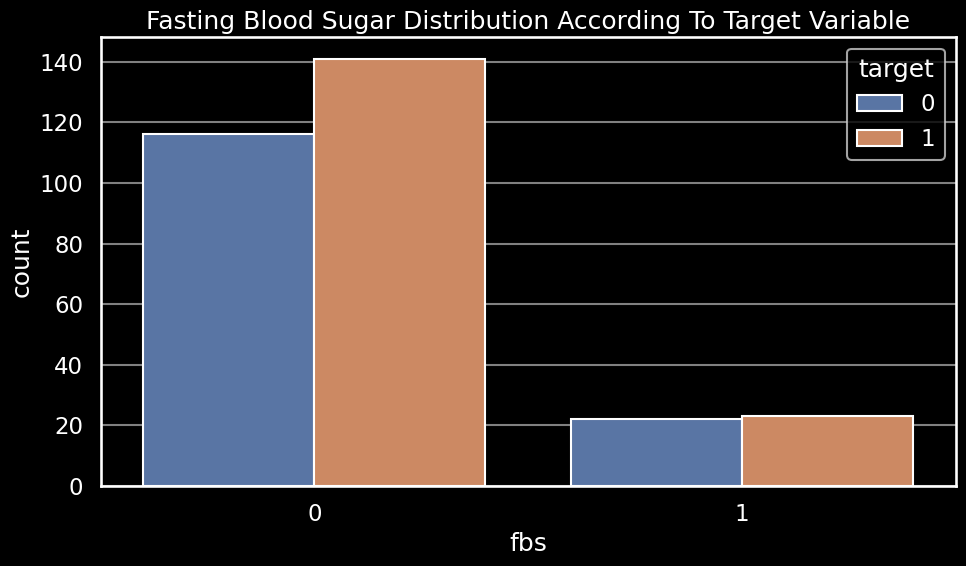

In [22]:
sns.countplot(data=df, x="fbs", hue="target")
plt.title("Fasting Blood Sugar Distribution According To Target Variable")
plt.tight_layout()
plt.show()

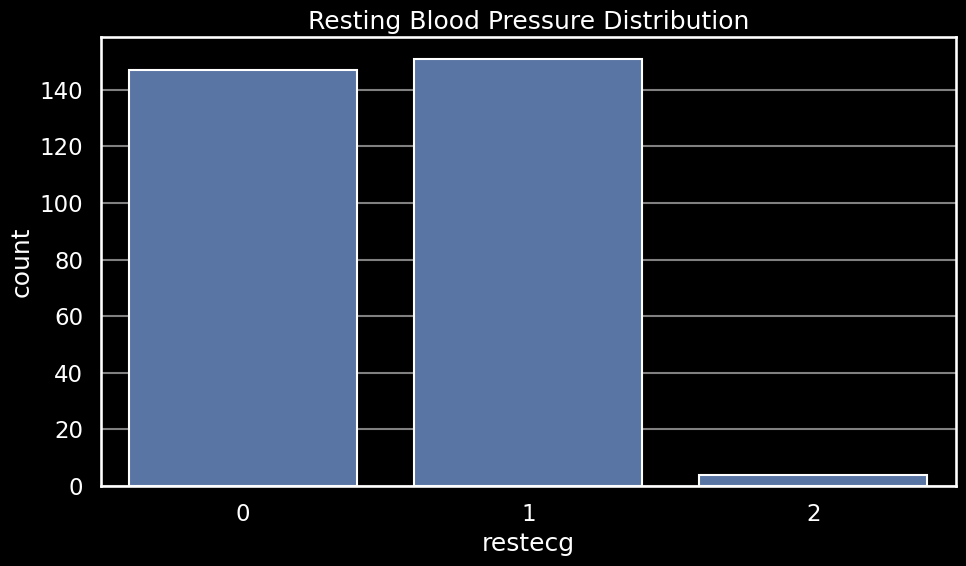

In [23]:
#17. Check Resting Blood Pressure Distribution

sns.countplot(data=df, x="restecg")
plt.title("Resting Blood Pressure Distribution")
plt.tight_layout()
plt.show()

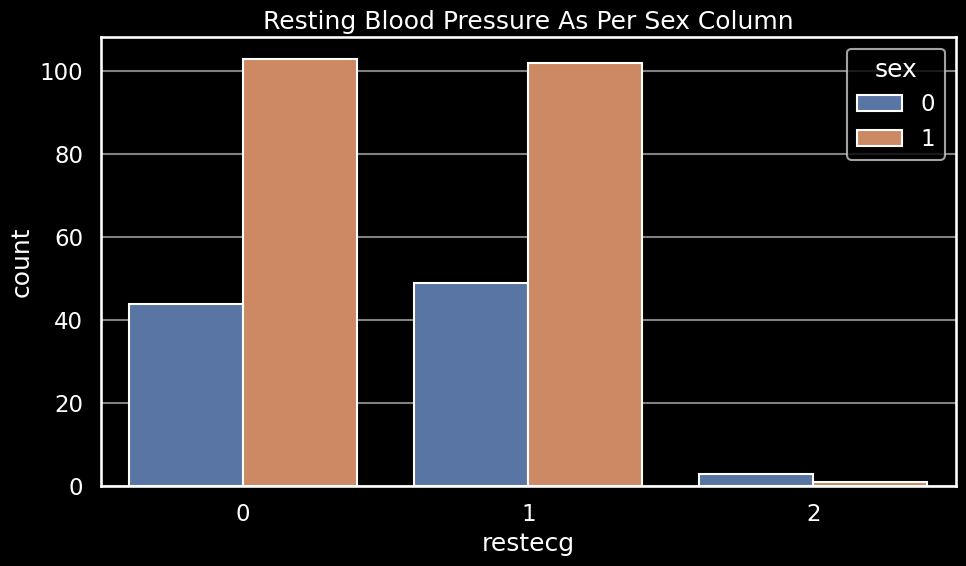

In [24]:
#18. Compare Resting Blood Pressure As Per Sex Column

sns.countplot(data=df, x="restecg", hue="sex")
plt.title("Resting Blood Pressure As Per Sex Column")
plt.tight_layout()
plt.show()

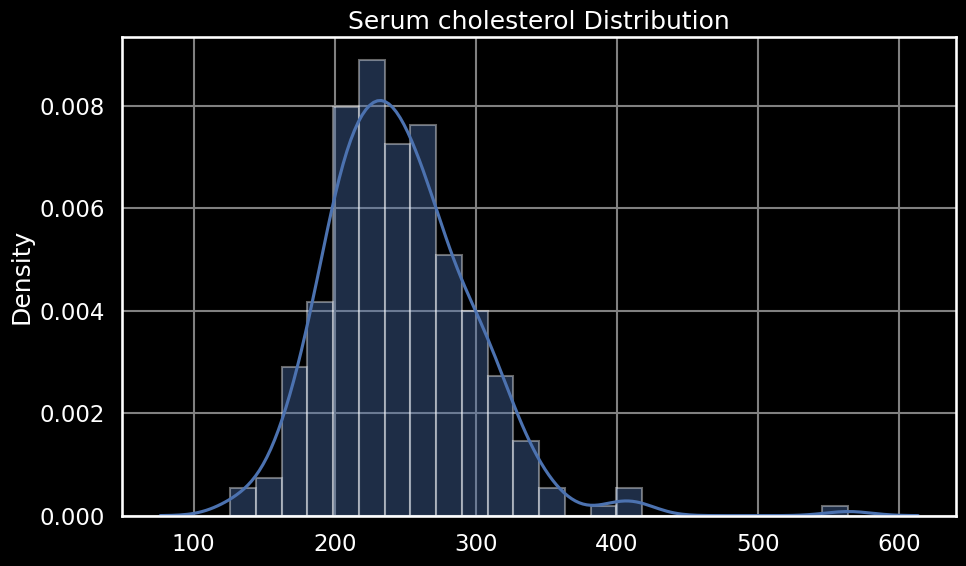

In [25]:
#19. Show Distribution of Serum cholesterol

sns.distplot(x=df['chol'])
plt.title("Serum cholesterol Distribution")
plt.xlabel("")
plt.tight_layout()
plt.show()

In [26]:
#20. Plot Continuous Variables

df.oldpeak.nunique()

40

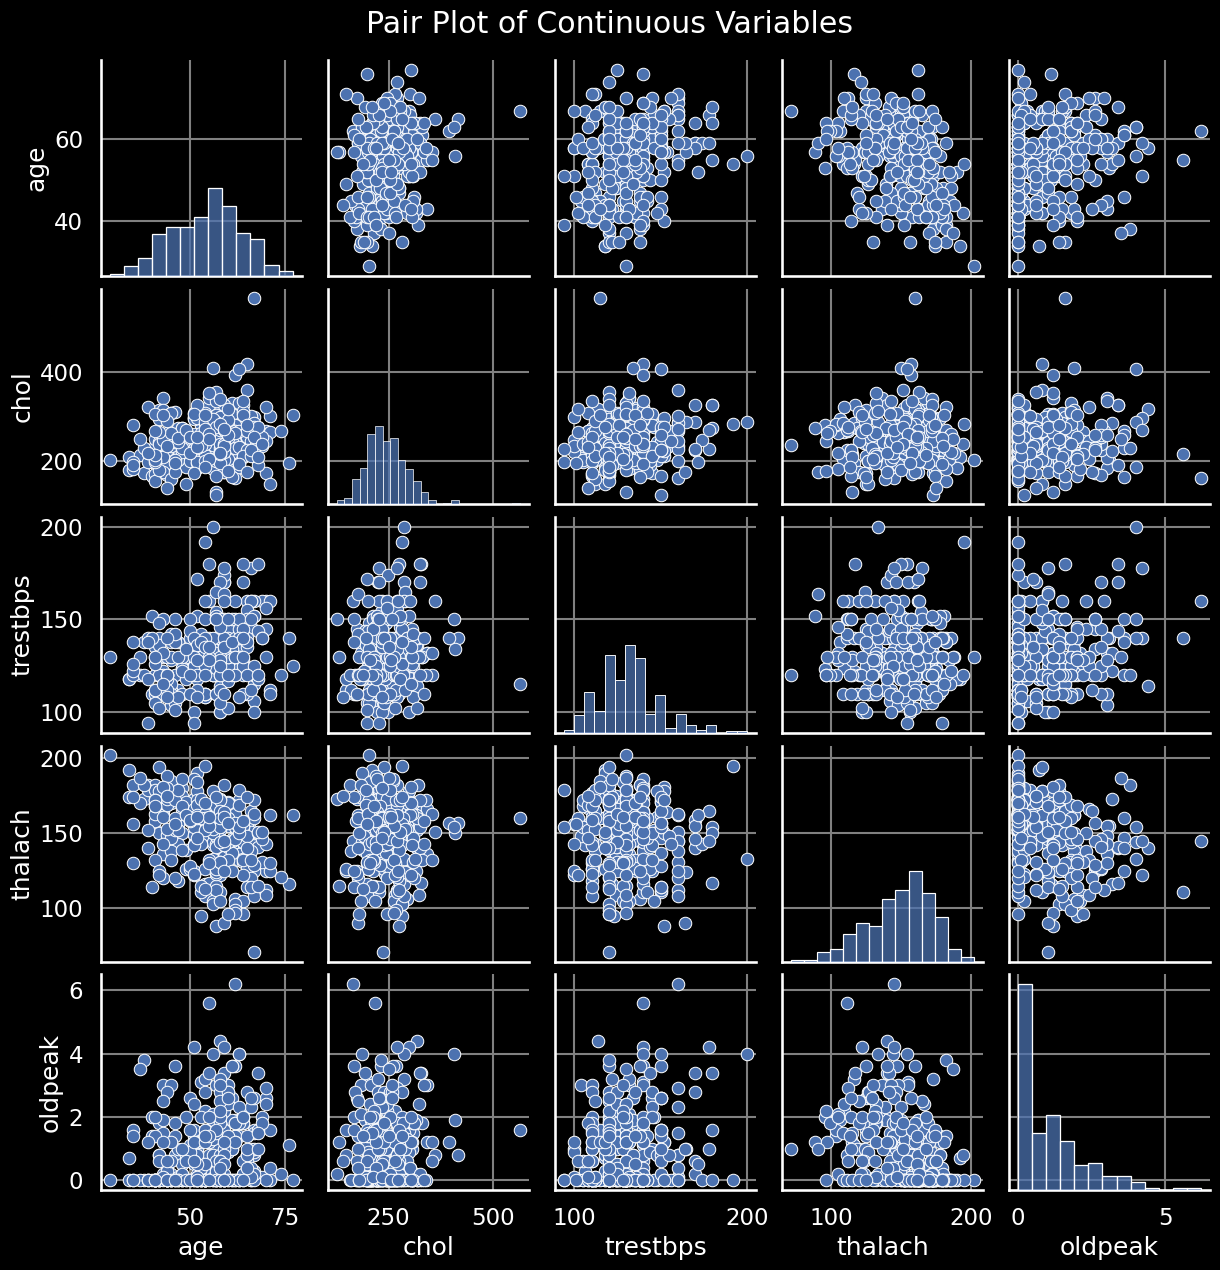

In [27]:
continous_variables=['age', 'chol', 'trestbps', 'thalach', 'oldpeak']

sns.pairplot(df[continous_variables])
plt.suptitle('Pair Plot of Continuous Variables', y=1.02)
plt.show()